In [64]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries

In [65]:
f = open("dialogs.txt", "r")
print(f.read())
# reading the data 

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [66]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
# Reading the data

In [67]:
df
# loading the data

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
5,i've been good. i'm in school right now.,what school do you go to?
6,what school do you go to?,i go to pcc.
7,i go to pcc.,do you like it there?
8,do you like it there?,it's okay. it's a really big campus.
9,it's okay. it's a really big campus.,good luck with school.


## Data Understanding

In [68]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(1578, 2)

In [69]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [70]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     1578 non-null   object
 1   Response  1577 non-null   object
dtypes: object(2)
memory usage: 24.8+ KB


In [71]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,1578,1577
unique,1514,1509
top,what do you mean?,what do you mean?
freq,6,6


In [72]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       1514
Response    1509
dtype: int64

In [73]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    1
dtype: int64

In [74]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

Query
what do you mean?                                                                     6
why is that?                                                                          5
what happened?                                                                        4
why not?                                                                              4
no, i haven't.                                                                        3
what's that?                                                                          3
really?                                                                               3
is that right?                                                                        3
yes, i do.                                                                            3
of course.                                                                            3
how come?                                                                             3
what's going on?          

In [75]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

Response
what do you mean?                                                                            6
of course.                                                                                   5
why is that?                                                                                 5
what happened?                                                                               4
yes, i do.                                                                                   4
why not?                                                                                     4
thank you.                                                                                   3
really?                                                                                      3
how come?                                                                                    3
what's that?                                                                                 3
me too.                                  

## Data Visualization

In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [77]:
Text=df['Query']

In [78]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

In [79]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [80]:
# Define or import the necessary functions
def alphanumeric(text):
    # Your implementation here
    pass

def punc_lower(text):
    # Your implementation here
    pass

def remove_n(text):
    # Your implementation here
    pass

def remove_non_ascii(text):
    # Your implementation here
    pass

# Now you can use these functions in the map calls
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [81]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",None,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,None,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,None,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,None,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,None,0.000,0.549,0.451,0.6249
5,i've been good. i'm in school right now.,None,0.000,0.707,0.293,0.4404
6,what school do you go to?,None,0.000,1.000,0.000,0.0000
7,i go to pcc.,None,0.000,1.000,0.000,0.0000
8,do you like it there?,None,0.000,0.615,0.385,0.3612
9,it's okay. it's a really big campus.,None,0.000,0.725,0.275,0.2263


In [82]:
from wordcloud import WordCloud
# importing word cloud

In [83]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

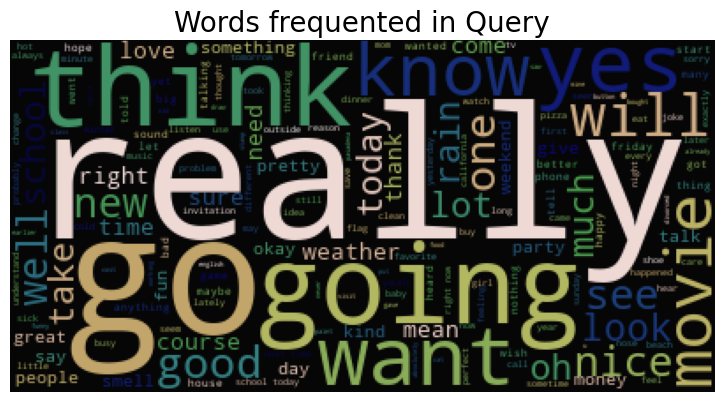

In [84]:
wordcloud(df,'Query')
# top words in the query column

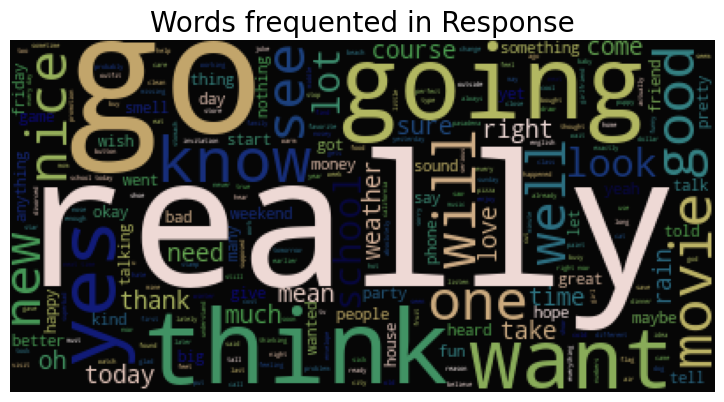

In [85]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [86]:
# Removing special characters

In [87]:
import re
# importing regular expressions

In [88]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [89]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [90]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [91]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [92]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [93]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,None,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,None,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,None,0.000,0.250,0.750,0.8402
3,no problem so how have you been,None,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,None,0.000,0.549,0.451,0.6249
5,i ve been good i m in school right now,None,0.000,0.707,0.293,0.4404
6,what school do you go to,None,0.000,1.000,0.000,0.0000
7,i go to pcc,None,0.000,1.000,0.000,0.0000
8,do you like it there,None,0.000,0.615,0.385,0.3612
9,it s okay it s a really big campus,None,0.000,0.725,0.275,0.2263


In [94]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [95]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,None,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,None,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,None,0.000,0.250,0.750,0.8402
3,no problem so how have you been,None,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,None,0.000,0.549,0.451,0.6249
5,i ve been good i m in school right now,None,0.000,0.707,0.293,0.4404
6,what school do you go to,None,0.000,1.000,0.000,0.0000
7,i go to pcc,None,0.000,1.000,0.000,0.0000
8,do you like it there,None,0.000,0.615,0.385,0.3612
9,it s okay it s a really big campus,None,0.000,0.725,0.275,0.2263


### Important Sentence

In [96]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [97]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,None,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,None,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,None,0.0,0.400,0.600,0.8885
1492,if you re going to make a wish wish that you ...,None,0.0,0.542,0.458,0.8516
310,well it s good that you re so talented,None,0.0,0.302,0.698,0.8497


### Top Positive Sentence

In [98]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [99]:
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1191,yes,None,0.0,0.0,1.0,0.4019
1258,i agree,None,0.0,0.0,1.0,0.3612
980,yes,None,0.0,0.0,1.0,0.4019
223,well congratulations,None,0.0,0.0,1.0,0.7184
300,thanks,None,0.0,0.0,1.0,0.4404


### Top Negative Sentence

In [100]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [101]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
154,no problem,None,1.000,0.000,0.0,-0.5994
1294,no,None,1.000,0.000,0.0,-0.2960
13,never better thanks,None,0.828,0.172,0.0,-0.5875
998,i hate shots,None,0.787,0.213,0.0,-0.5719
968,i hate shaving,None,0.787,0.213,0.0,-0.5719


### Top Neutral Sentence

In [102]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [103]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,None,0.0,1.0,0.0,0.0
911,that s a lot of work,None,0.0,1.0,0.0,0.0
922,i turned up the volume,None,0.0,1.0,0.0,0.0
921,what did you do,None,0.0,1.0,0.0,0.0
917,you re sitting there with your mouth open,None,0.0,1.0,0.0,0.0


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [105]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [106]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [107]:
feature_names = tfidf.get_feature_names_out()
print(feature_names)


['able' 'about' 'absolutely' ... 'yourself' 'yy' 'zip']


# Application

In [108]:
from sklearn.metrics.pairwise import cosine_distances

In [109]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [110]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])